# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
%pip install --upgrade plotly

## Import Statements

In [48]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [4]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

## **Check!!!!!** df_hh_income - Median Household Income 2015


In [5]:
print(df_hh_income.head())
print(df_hh_income.shape)
print(f'The dataset has {df_hh_income.shape[0]} rows and {df_hh_income.shape[1]} columns')
print(df_hh_income.columns)
print(f'Any NaN values? {df_hh_income.isna().values.any()}')
print(f'Any duplicates? {df_hh_income.duplicated().values.any()}')

  Geographic Area             City Median Income
0              AL       Abanda CDP         11207
1              AL   Abbeville city         25615
2              AL  Adamsville city         42575
3              AL     Addison town         37083
4              AL       Akron town         21667
(29322, 3)
The dataset has 29322 rows and 3 columns
Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
Any NaN values? True
Any duplicates? False


## df_pct_poverty - Pct People Below Poverty Level

In [6]:
print(df_pct_poverty.head())
print(df_pct_poverty.shape)
print(f'The dataset has {df_pct_poverty.shape[0]} rows and {df_pct_poverty.shape[1]} columns')
print(df_pct_poverty.columns)
print(f'Any NaN values? {df_pct_poverty.isna().values.any()}')
print(f'Any duplicates? {df_pct_poverty.duplicated().values.any()}')

  Geographic Area             City poverty_rate
0              AL       Abanda CDP         78.8
1              AL   Abbeville city         29.1
2              AL  Adamsville city         25.5
3              AL     Addison town         30.7
4              AL       Akron town           42
(29329, 3)
The dataset has 29329 rows and 3 columns
Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
Any NaN values? False
Any duplicates? False


## df_pct_completed_hs - Pct Over 25 Completed High School

In [7]:
print(df_pct_completed_hs.head())
print(df_pct_completed_hs.shape)
print(f'The dataset has {df_pct_completed_hs.shape[0]} rows and {df_pct_completed_hs.shape[1]} columns')
print(df_pct_completed_hs.columns)
print(f'Any NaN values? {df_pct_completed_hs.isna().values.any()}')
print(f'Any duplicates? {df_pct_completed_hs.duplicated().values.any()}')

  Geographic Area             City percent_completed_hs
0              AL       Abanda CDP                 21.2
1              AL   Abbeville city                 69.1
2              AL  Adamsville city                 78.9
3              AL     Addison town                 81.4
4              AL       Akron town                 68.6
(29329, 3)
The dataset has 29329 rows and 3 columns
Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
Any NaN values? False
Any duplicates? False


## df_share_race_city - Share of Race By City

In [8]:
print(df_share_race_city.head())
print(df_share_race_city.shape)
print(f'The dataset has {df_share_race_city.shape[0]} rows and {df_share_race_city.shape[1]} columns')
print(df_share_race_city.columns)
print(f'Any NaN values? {df_share_race_city.isna().values.any()}')
print(f'Any duplicates? {df_share_race_city.duplicated().values.any()}')

  Geographic area             City share_white share_black  \
0              AL       Abanda CDP        67.2        30.2   
1              AL   Abbeville city        54.4        41.4   
2              AL  Adamsville city        52.3        44.9   
3              AL     Addison town        99.1         0.1   
4              AL       Akron town        13.2        86.5   

  share_native_american share_asian share_hispanic  
0                     0           0            1.6  
1                   0.1           1            3.1  
2                   0.5         0.3            2.3  
3                     0         0.1            0.4  
4                     0           0            0.3  
(29268, 7)
The dataset has 29268 rows and 7 columns
Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')
Any NaN values? False
Any duplicates? False


## **Check!!!!!** df_fatalities - Deaths by Police US

In [9]:
print(df_fatalities.head())
print(df_fatalities.shape)
print(f'The dataset has {df_fatalities.shape[0]} rows and {df_fatalities.shape[1]} columns')
print(df_fatalities.columns)
print(f'Any NaN values? {df_fatalities.isna().values.any()}')
print(f'Any duplicates? {df_fatalities.duplicated().values.any()}')

   id                name      date   manner_of_death       armed   age  \
0   3          Tim Elliot  02/01/15              shot         gun 53.00   
1   4    Lewis Lee Lembke  02/01/15              shot         gun 47.00   
2   5  John Paul Quintero  03/01/15  shot and Tasered     unarmed 23.00   
3   8     Matthew Hoffman  04/01/15              shot  toy weapon 32.00   
4   9   Michael Rodriguez  04/01/15              shot    nail gun 39.00   

  gender race           city state  signs_of_mental_illness threat_level  \
0      M    A        Shelton    WA                     True       attack   
1      M    W          Aloha    OR                    False       attack   
2      M    H        Wichita    KS                    False        other   
3      M    W  San Francisco    CA                     True       attack   
4      M    H          Evans    CO                    False       attack   

          flee  body_camera  
0  Not fleeing        False  
1  Not fleeing        False  
2 

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

### Median Household Income df_hh_income > clean_df_hh_income

In [10]:
clean_df_hh_income = df_hh_income
clean_df_hh_income.isnull().sum()

,0
Geographic Area,0
City,0
Median Income,51


In [11]:
clean_df_hh_income['Median Income'] = pd.to_numeric(clean_df_hh_income['Median Income'], errors="coerce")
clean_df_hh_income.fillna(0, inplace=True)

print(clean_df_hh_income)
clean_df_hh_income.isnull().sum()

      Geographic Area                    City  Median Income
0                  AL              Abanda CDP      11,207.00
1                  AL          Abbeville city      25,615.00
2                  AL         Adamsville city      42,575.00
3                  AL            Addison town      37,083.00
4                  AL              Akron town      21,667.00
...               ...                     ...            ...
29317              WY  Woods Landing-Jelm CDP           0.00
29318              WY            Worland city      41,523.00
29319              WY             Wright town      77,114.00
29320              WY              Yoder town      37,500.00
29321              WY           Y-O Ranch CDP           0.00

[29322 rows x 3 columns]


,0
Geographic Area,0
City,0
Median Income,0


In [12]:
clean_df_hh_income.to_csv('clean_df_hh_income.csv', index=False)

### Deaths by Police US df_fatalities > clean_df_fatalities

In [13]:
clean_df_fatalities = df_fatalities
clean_df_fatalities.isnull().sum()

,0
id,0
name,0
date,0
manner_of_death,0
armed,9
age,77
gender,0
race,195
city,0
state,0


In [14]:
clean_df_fatalities['armed'] = clean_df_fatalities['armed'].fillna('undetermined')

clean_df_fatalities['race'] = clean_df_fatalities['race'].fillna('O')

clean_df_fatalities['flee'] = clean_df_fatalities['flee'].fillna('Other')

clean_df_fatalities.isnull().sum()

,0
id,0
name,0
date,0
manner_of_death,0
armed,0
age,77
gender,0
race,0
city,0
state,0


In [15]:
clean_df_fatalities.dropna(inplace=True)
clean_df_fatalities.isnull().sum()

,0
id,0
name,0
date,0
manner_of_death,0
armed,0
age,0
gender,0
race,0
city,0
state,0


In [16]:
clean_df_fatalities.to_csv('clean_df_fatalities.csv', index=False)

In [17]:
print(clean_df_hh_income.duplicated().sum())
print(clean_df_fatalities.duplicated().sum())

0
0


# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [18]:
poverty_rate_by_state = df_pct_poverty.sort_values(by='poverty_rate', ascending=False)
print(poverty_rate_by_state)

      Geographic Area                                    City poverty_rate
4472               FL                      Homestead Base CDP         98.6
23716              SD                               Allen CDP         94.1
20428              OK                          Badger Lee CDP         93.8
27738              WA                             Outlook CDP         93.8
26509              UT                            Randlett CDP         93.5
...               ...                                     ...          ...
24980              TX                         El Mesquite CDP            -
2864               CA                          Myers Flat CDP            -
10747              LA                           Sugartown CDP            -
16400              NJ                           Zarephath CDP            -
23109              PA  University of Pittsburgh Johnstown CDP            -

[29329 rows x 3 columns]


In [19]:
clean_df_pct_poverty = df_pct_poverty

In [20]:
clean_df_pct_poverty['poverty_rate'] = pd.to_numeric(clean_df_pct_poverty['poverty_rate'], errors='coerce')
clean_df_pct_poverty.isnull().sum()

,0
Geographic Area,0
City,0
poverty_rate,201


In [21]:
clean_df_pct_poverty['poverty_rate'] = clean_df_pct_poverty['poverty_rate'].fillna(0)
clean_df_pct_poverty.isnull().sum()

,0
Geographic Area,0
City,0
poverty_rate,0


In [22]:
clean_df_pct_poverty.to_csv('clean_df_pct_poverty.csv', index=False)

In [23]:
poverty_rate_by_state = clean_df_pct_poverty.sort_values(by='poverty_rate', ascending=True)
print(poverty_rate_by_state)

      Geographic Area              City  poverty_rate
29328              WY     Y-O Ranch CDP          0.00
17283              NY  Harbor Hills CDP          0.00
17272              NY          Hall CDP          0.00
17264              NY   Greigsville CDP          0.00
3251               CA       Storrie CDP          0.00
...               ...               ...           ...
14782              MT       Elkhorn CDP        100.00
13888              MO      Danville CDP        100.00
13186              MN     The Ranch CDP        100.00
618                AK   Birch Creek CDP        100.00
16716              NM        Regina CDP        100.00

[29329 rows x 3 columns]


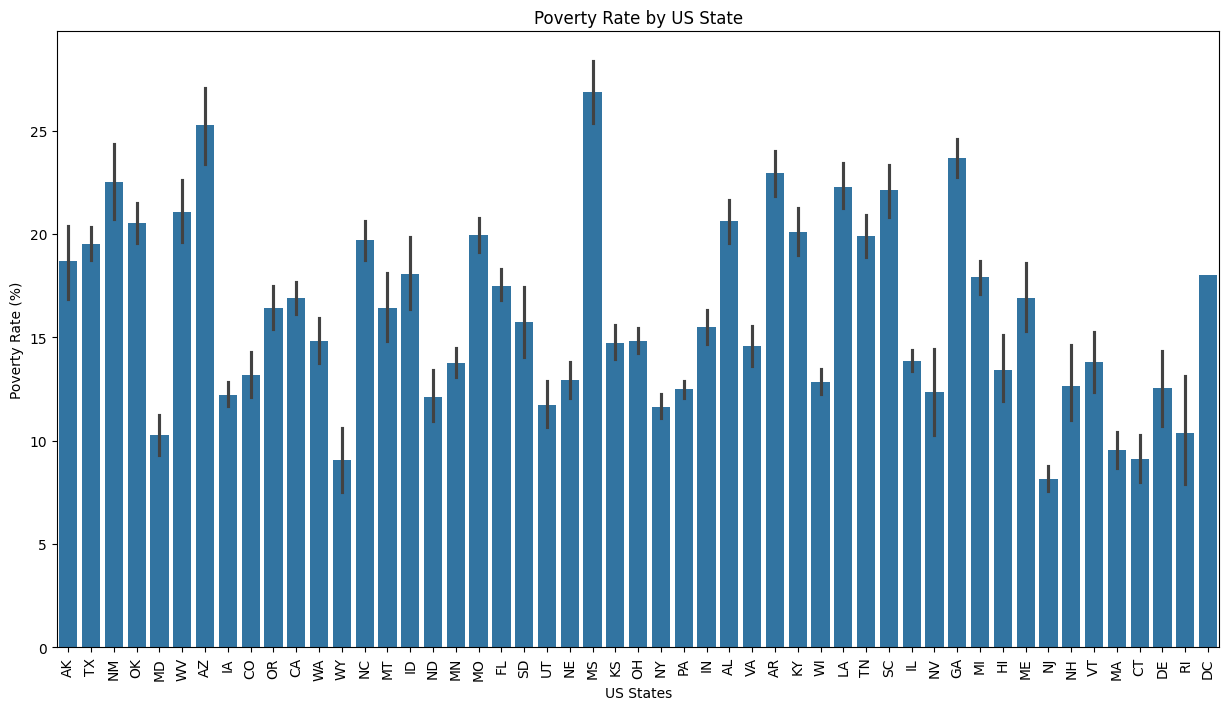

In [24]:
poverty_rate_by_state = clean_df_pct_poverty.sort_values(by='poverty_rate', ascending=False)

plt.figure(figsize=(15, 8))
sns.barplot(x='Geographic Area',
            y='poverty_rate',
            data=poverty_rate_by_state)
plt.xticks(rotation=90)
plt.xlabel('US States')
plt.ylabel('Poverty Rate (%)')
plt.title('Poverty Rate by US State')
plt.show()

In [25]:
# States with the highest and lowest poverty rates

highest_poverty_state = poverty_rate_by_state.iloc[0]['Geographic Area']
highest_poverty_rate = poverty_rate_by_state.iloc[0]['poverty_rate']
print(f"The state with the highest poverty rate is {highest_poverty_state} with a rate of {highest_poverty_rate}%")


lowest_poverty_state = poverty_rate_by_state.iloc[-1]['Geographic Area']
lowest_poverty_rate = poverty_rate_by_state.iloc[-1]['poverty_rate']
print(f"The state with the lowest poverty rate is {lowest_poverty_state} with a rate of {lowest_poverty_rate}%")

The state with the highest poverty rate is AK with a rate of 100.0%
The state with the lowest poverty rate is WY with a rate of 0.0%


# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [26]:
high_school_graduation_rate = df_pct_completed_hs.sort_values(by='percent_completed_hs', ascending=True)
print(high_school_graduation_rate)

      Geographic Area                  City percent_completed_hs
14024              MO             Goss town                    -
770                AK            Loring CDP                    -
14570              MO      Tarrants village                    -
1113               AZ      Hunter Creek CDP                    -
16280              NJ       Ross Corner CDP                    -
...               ...                   ...                  ...
7176               IL         Scott AFB CDP                 99.8
26212              TX  West Lake Hills city                 99.8
23070              PA          Toftrees CDP                 99.8
25983              TX          Serenada CDP                 99.9
5731               HI   Kaneohe Station CDP                 99.9

[29329 rows x 3 columns]


In [27]:
clean_df_pct_completed_hs = df_pct_completed_hs

In [28]:
clean_df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(clean_df_pct_completed_hs['percent_completed_hs'], errors='coerce')
clean_df_pct_completed_hs.isnull().sum()

,0
Geographic Area,0
City,0
percent_completed_hs,197


In [29]:
clean_df_pct_completed_hs['percent_completed_hs'] = clean_df_pct_completed_hs['percent_completed_hs'].fillna(0)
clean_df_pct_completed_hs.isnull().sum()

,0
Geographic Area,0
City,0
percent_completed_hs,0


In [30]:
clean_df_pct_completed_hs.to_csv('clean_df_pct_completed_hs.csv', index=False)

In [31]:
high_school_graduation_rate = clean_df_pct_completed_hs.sort_values(by='percent_completed_hs', ascending=True)
print(high_school_graduation_rate)

      Geographic Area                 City  percent_completed_hs
25237              TX            Indio CDP                  0.00
25464              TX        Los Lobos CDP                  0.00
25457              TX   Los Corralitos CDP                  0.00
25456              TX  Los Centenarios CDP                  0.00
25452              TX      Los Angeles CDP                  0.00
...               ...                  ...                   ...
3826               CO          Sawpit town                100.00
23916              SD            Lily town                100.00
23920              SD           Loomis CDP                100.00
3820               CO       St. Mary's CDP                100.00
29328              WY        Y-O Ranch CDP                100.00

[29329 rows x 3 columns]


In [32]:
highest_graduation_state = high_school_graduation_rate.iloc[-1]['Geographic Area']
highest_graduation_rate = high_school_graduation_rate.iloc[-1]['percent_completed_hs']

lowest_graduation_state = high_school_graduation_rate.iloc[0]['Geographic Area']
lowest_graduation_rate = high_school_graduation_rate.iloc[0]['percent_completed_hs']

print(f'State with the highest high school graduation rate is {highest_graduation_state} with {highest_graduation_rate}%')
print(f'State with the lowest high school graduation rate is {lowest_graduation_state} with {lowest_graduation_rate}%')

State with the highest high school graduation rate is WY with 100.0%
State with the lowest high school graduation rate is TX with 0.0%


# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

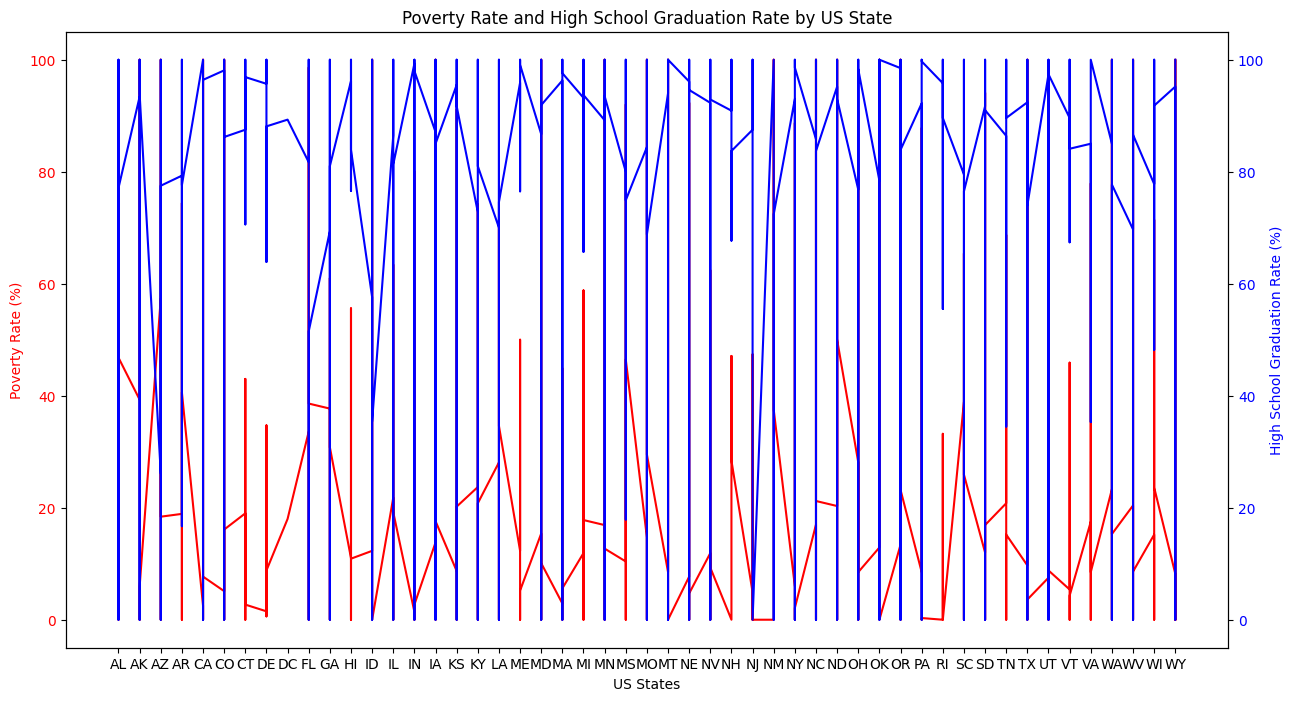

In [33]:
fig, ax1 = plt.subplots(figsize=(15, 8))

color = 'red'
ax1.plot(clean_df_pct_poverty['Geographic Area'], clean_df_pct_poverty['poverty_rate'], color=color)
ax1.set_xlabel('US States')
ax1.set_ylabel('Poverty Rate (%)', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'blue'
ax2.plot(clean_df_pct_completed_hs['Geographic Area'], clean_df_pct_completed_hs['percent_completed_hs'], color=color)
ax2.set_ylabel('High School Graduation Rate (%)', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout
plt.xticks(rotation=90)
plt.title('Poverty Rate and High School Graduation Rate by US State')
plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

In [ ]:
sns.jointplot(x='poverty_rate',
              y='percent_completed_hs',
              data=pd.merge(clean_df_pct_poverty, clean_df_pct_completed_hs, on='Geographic Area'),
              kind='kde')
plt.show()

In [34]:
rel_poverty_graduation_rate = pd.merge(clean_df_pct_poverty, clean_df_pct_completed_hs, on='Geographic Area')
print(rel_poverty_graduation_rate)

         Geographic Area         City_x  poverty_rate                  City_y  \
0                     AL     Abanda CDP         78.80              Abanda CDP   
1                     AL     Abanda CDP         78.80          Abbeville city   
2                     AL     Abanda CDP         78.80         Adamsville city   
3                     AL     Abanda CDP         78.80            Addison town   
4                     AL     Abanda CDP         78.80              Akron town   
...                  ...            ...           ...                     ...   
25607488              WY  Y-O Ranch CDP          0.00  Woods Landing-Jelm CDP   
25607489              WY  Y-O Ranch CDP          0.00            Worland city   
25607490              WY  Y-O Ranch CDP          0.00             Wright town   
25607491              WY  Y-O Ranch CDP          0.00              Yoder town   
25607492              WY  Y-O Ranch CDP          0.00           Y-O Ranch CDP   

          percent_completed

In [ ]:
sns.jointplot(data=rel_poverty_graduation_rate,
             x='poverty_rate',
             y='percent_completed_hs',
             kind='kde')

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

I can’t make the previous database due to the load. More than an hour and no result

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

In [47]:
race_by_state = df_share_race_city.groupby('Geographic area')[['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']].sum()
race_by_state = race_by_state.reset_index()

race_by_state_melted = race_by_state.melt(id_vars='Geographic area',
                                          var_name='Race',
                                          value_name='Share')

fig = px.bar(race_by_state_melted,
             x='Geographic area',
             y='Share',
             color='Race',
             title='Racial Makeup of Each US State')

fig.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [52]:
race_counts = clean_df_fatalities['race'].value_counts()

fig = go.Figure(data=[go.Pie(labels=race_counts.index,
                             values=race_counts.values,
                             hole=.3)])

fig.update_layout(title_text="People Killed by Police by Race")

fig.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

In [53]:
gender_counts = clean_df_fatalities['gender'].value_counts()

fig = go.Figure(data=[go.Pie(labels=gender_counts.index,
                             values=gender_counts.values,
                             hole=.3)])

fig.update_layout(title_text="Total Number of Deaths of Men and Women")

fig.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

In [55]:
fig = px.box(clean_df_fatalities,
             x='gender',
             y='age',
             color='manner_of_death',
             title='Age and Manner of Death')

fig.show()

# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

In [57]:
armed_counts = clean_df_fatalities['armed'].value_counts()

fig = px.bar(armed_counts,
             x=armed_counts.index,
             y=armed_counts.values,
             labels={'x': 'Weapon',
                     'y': 'Number of Daths'},
             title='Kind of weapon the deceased was carrying')

fig.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [58]:
under_25_year = clean_df_fatalities[clean_df_fatalities['age'] < 25]
percentage_under_25 = (len(under_25_year) / len(clean_df_fatalities)) * 100

print(f'{percentage_under_25:.2f}% of people killed were under 25 years old.')

18.31% of people killed were under 25 years old.


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

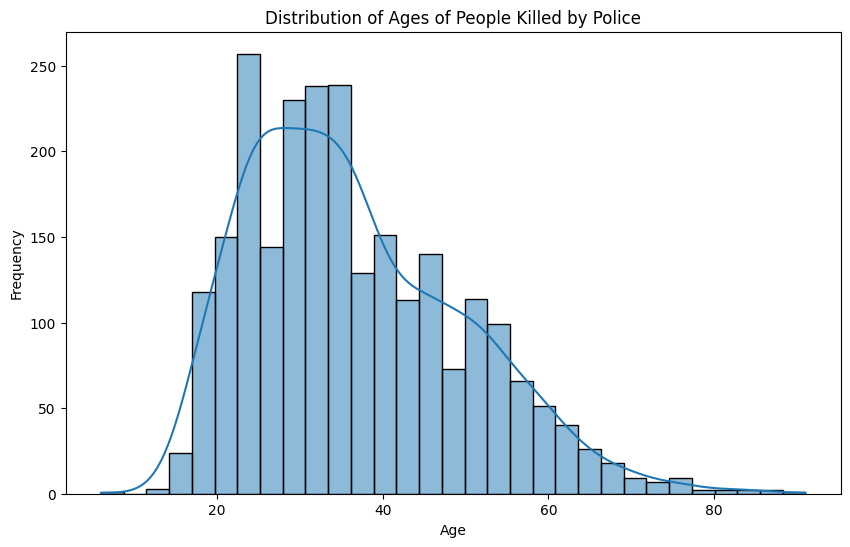

In [62]:
plt.figure(figsize=(10, 6))
sns.histplot(clean_df_fatalities['age'], kde=True)
plt.title('Distribution of Ages of People Killed by Police')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions?

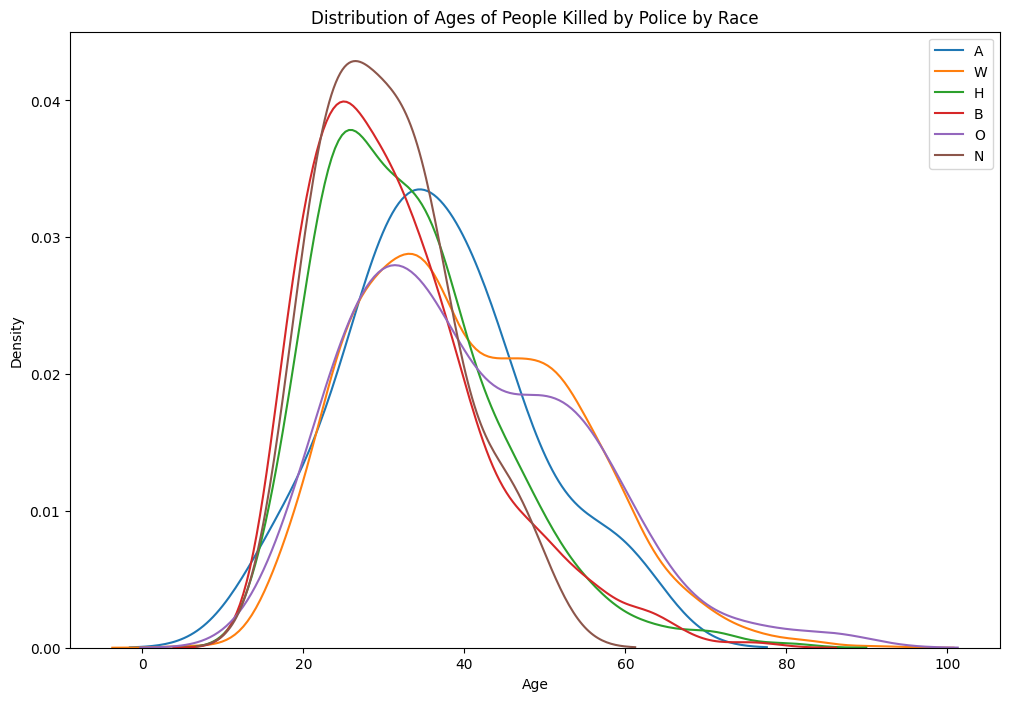

In [63]:
plt.figure(figsize=(12, 8))
for race in clean_df_fatalities['race'].unique():
    sns.kdeplot(clean_df_fatalities[clean_df_fatalities['race'] == race]['age'], label=race)
plt.title('Distribution of Ages of People Killed by Police by Race')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race.

In [64]:
race_counts = clean_df_fatalities['race'].value_counts()

fig = px.bar(x=race_counts.index,
             y=race_counts.values,
             labels={'x': 'Race', 'y': 'Number of Deaths'},
             title='Total Number of People Killed by Race')
fig.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [65]:
mental_illness_count = len(clean_df_fatalities[clean_df_fatalities['signs_of_mental_illness'] == True])
total_count = len(clean_df_fatalities)
percentage_mental_illness = (mental_illness_count / total_count) * 100

print(f'{percentage_mental_illness:.2f}% of people killed by police had signs of mental illness.')

25.18% of people killed by police had signs of mental illness.


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [66]:
city_counts = clean_df_fatalities['city'].value_counts().head(10)

fig = px.bar(x=city_counts.index,
             y=city_counts.values,
             labels={'x': 'City', 'y': 'Number of Deaths'},
             title='Top 10 Cities with the Most Police Killings')
fig.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.

In [67]:
top_10_cities = clean_df_fatalities['city'].value_counts().head(10).index

top_10_cities_df = clean_df_fatalities[clean_df_fatalities['city'].isin(top_10_cities)]

race_counts_by_city = top_10_cities_df.groupby(['city', 'race'])['id'].count().reset_index()

race_counts_by_city = race_counts_by_city.rename(columns={'id': 'death_count'})

merged_df = pd.merge(race_counts_by_city, df_share_race_city, left_on='city', right_on='Geographic area', how='left')

merged_df['death_rate_white'] = merged_df['death_count'] / merged_df['share_white']
merged_df['death_rate_black'] = merged_df['death_count'] / merged_df['share_black']
merged_df['death_rate_native_american'] = merged_df['death_count'] / merged_df['share_native_american']
merged_df['death_rate_asian'] = merged_df['death_count'] / merged_df['share_asian']
merged_df['death_rate_hispanic'] = merged_df['death_count'] / merged_df['share_hispanic']

merged_df

,city,race,death_count,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic,death_rate_white,death_rate_black,death_rate_native_american,death_rate_asian,death_rate_hispanic
0,Austin,B,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Austin,H,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Austin,W,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Chicago,B,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Chicago,H,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Chicago,O,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Chicago,W,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Columbus,B,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Columbus,O,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Columbus,W,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

In [68]:
state_fatalities = clean_df_fatalities.groupby('state')['id'].count().reset_index()
state_fatalities.rename(columns={'id': 'fatality_count'}, inplace=True)

fig = px.choropleth(state_fatalities,
                    locations='state',
                    locationmode="USA-states",
                    color='fatality_count',
                    scope="usa",
                    color_continuous_scale="Viridis",
                    title='Police Killings by US State')

fig.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?

In [69]:
clean_df_fatalities['date'] = pd.to_datetime(clean_df_fatalities['date'])

fatalities_by_year = clean_df_fatalities.groupby(clean_df_fatalities['date'].dt.year)['id'].count().reset_index()

fatalities_by_year = fatalities_by_year.rename(columns={'date': 'Year', 'id': 'Fatalities'})

fig = px.line(fatalities_by_year,
              x='Year',
              y='Fatalities',
              title='Number of Police Killings Over Time')

fig.show()

<ipython-input-69-fafdbde23a00>:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).